<a href="https://colab.research.google.com/github/HEMA1188/Medical_cost/blob/main/medical_cost_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df=pd.read_csv("medical_cost.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [27]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


Data Preprocessing

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [29]:
df.duplicated().sum()

1

In [30]:
df.shape

(1338, 7)

In [31]:
df=df.drop_duplicates()
df.shape

(1337, 7)

In [32]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

EDA Process

In [33]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df.describe(exclude='number')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [35]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [36]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [37]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

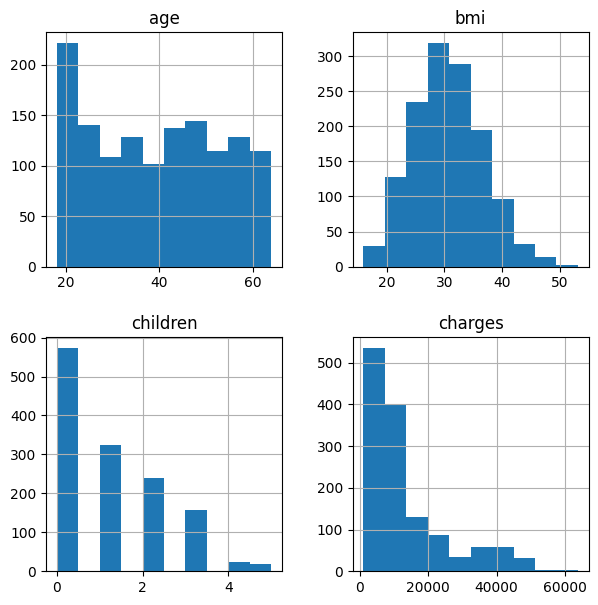

In [39]:
df.hist(figsize=(7, 7))

<ipython-input-41-291ae747d1b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


Text(0, 0.5, 'Count')

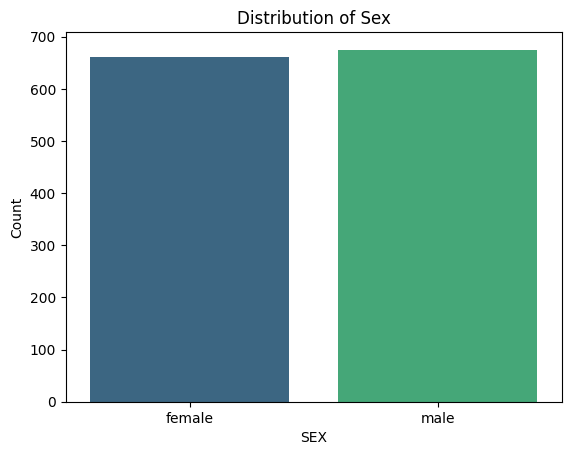

In [41]:
# Plot the distribution of 'SEX'
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Distribution of Sex')
plt.xlabel('SEX')
plt.ylabel('Count')

<ipython-input-42-54bccaebca5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


Text(0, 0.5, 'Count')

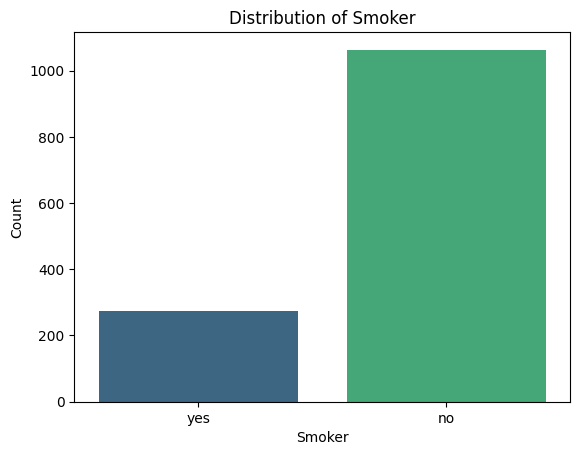

In [42]:
# Plot the distribution of 'Smoker'
sns.countplot(x='smoker', data=df, palette='viridis')
plt.title('Distribution of Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

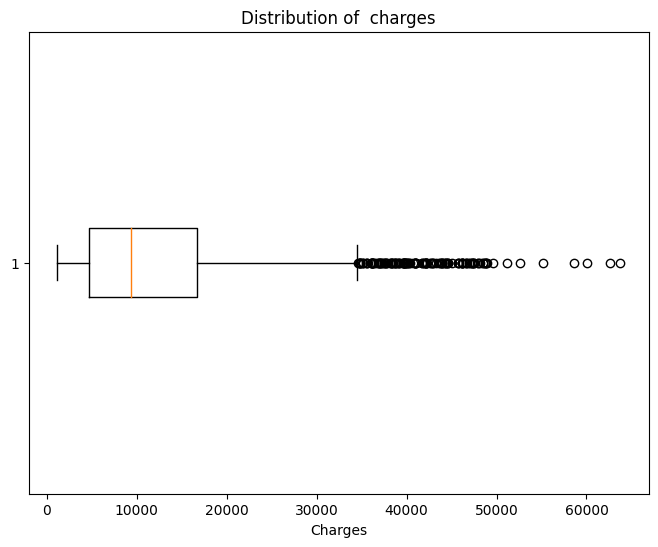

In [43]:

charges = df['charges']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(charges, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  charges')
plt.xlabel('Charges')
plt.show()

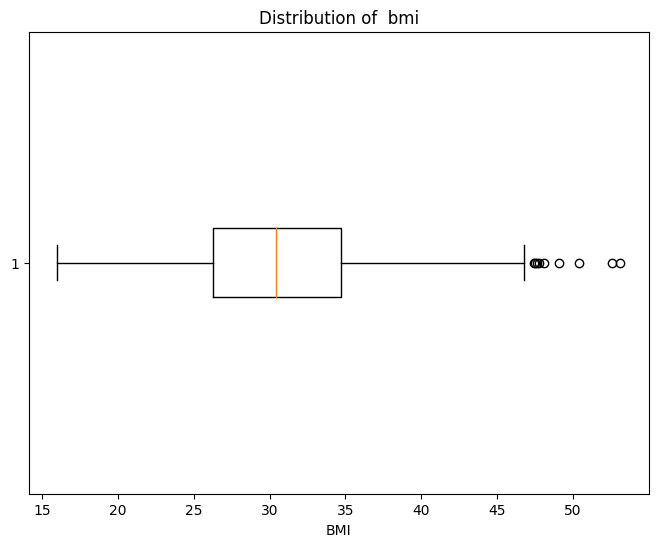

In [44]:
bmi = df['bmi']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(bmi, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  bmi')
plt.xlabel('BMI')
plt.show()

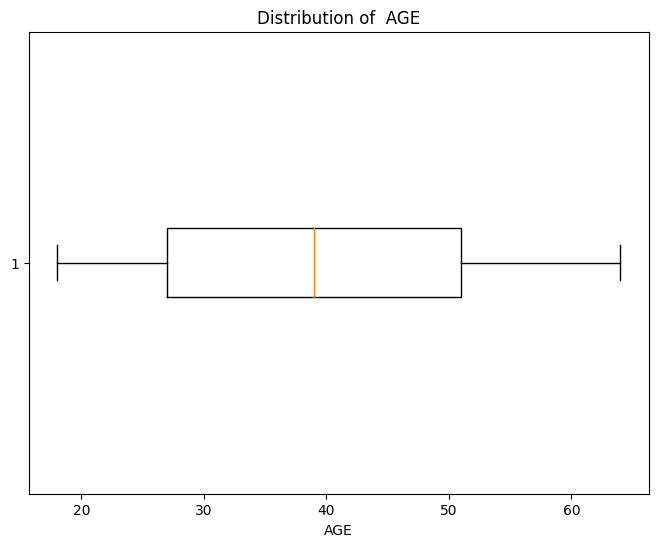

In [45]:
age = df['age']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(age, vert=False)  # vert=False for horizontal boxplot
plt.title('Distribution of  AGE')
plt.xlabel('AGE')
plt.show()

In [46]:
region_count = df['region'].value_counts()
region_count

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

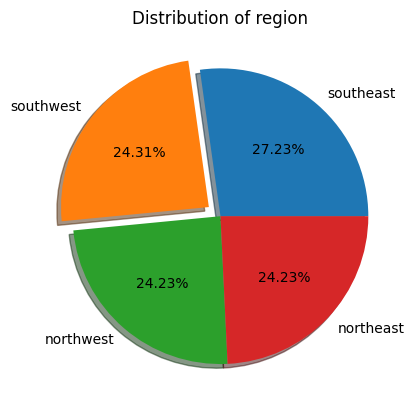

In [47]:
plt.pie(labels=region_count.index,
        x=region_count.values,
        shadow=True,
        autopct='%.2f%%',
        explode=(0,0.1,0,0))
plt.title("Distribution of region")
plt.show()

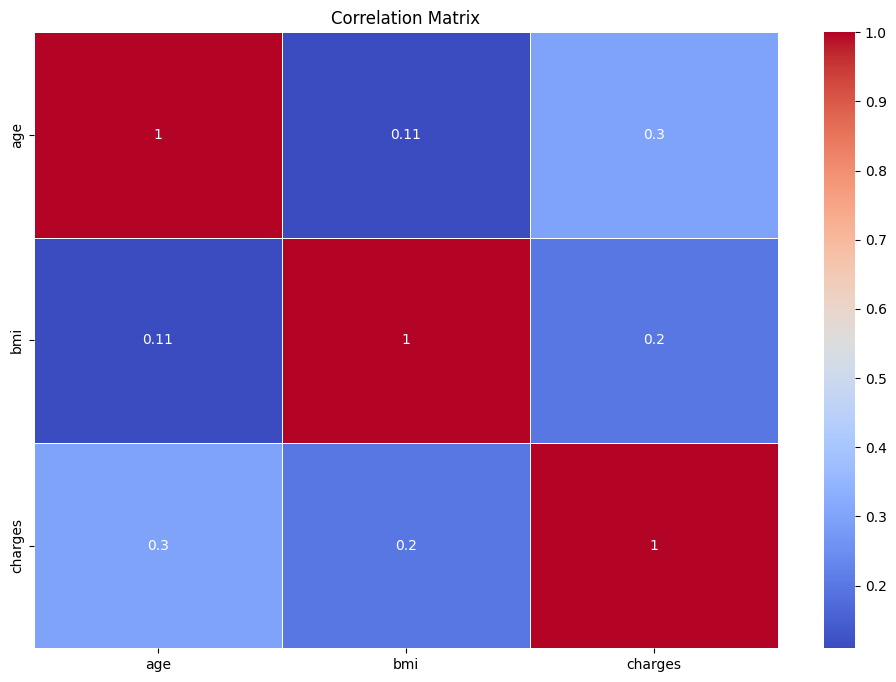

Correlation with Price:
 charges    1.000000
age        0.298308
bmi        0.198401
Name: charges, dtype: float64


In [48]:
corr_data=df[['age','bmi','charges']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify features with strong correlation to 'price'
charges_correlation = corr_data['charges'].sort_values(ascending=False)
print("Correlation with Price:\n", charges_correlation)

Text(0, 0.5, 'charges')

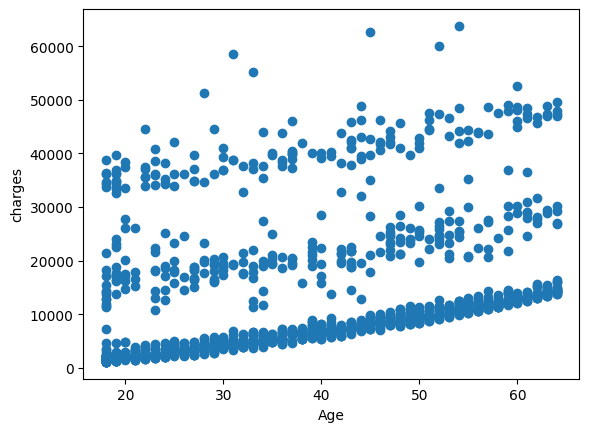

In [53]:
plt.scatter(data=df, x='age',y='charges')
plt.xlabel("Age")
plt.ylabel("charges")

Text(0, 0.5, 'Charges')

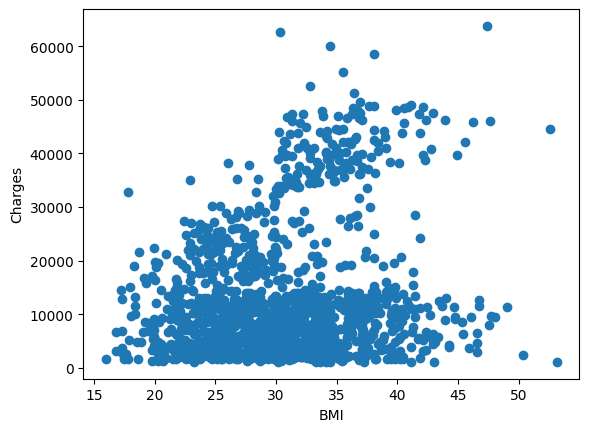

In [52]:
plt.scatter(data=df, x='bmi',y='charges')
plt.xlabel("BMI")
plt.ylabel("Charges")

Text(0, 0.5, 'Age')

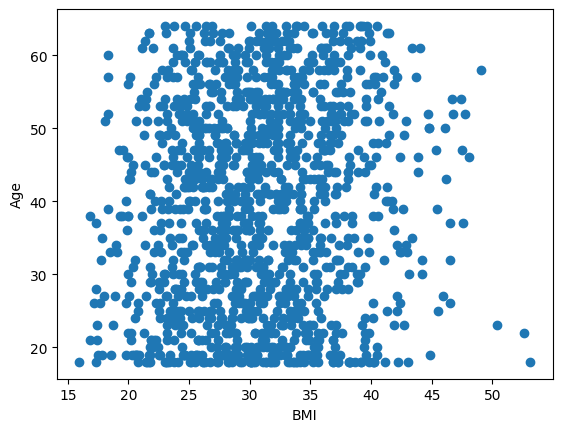

In [51]:
plt.scatter(data=df, x='bmi',y='age')
plt.xlabel("BMI")
plt.ylabel("Age")

Categorical data into numerical data

In [54]:
df['smoker']=df['smoker'].astype('category')
df['smoker']=df['smoker'].cat.codes

df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

df['region']=df['region'].astype('category')
df['region']=df['region'].cat.codes

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int8   
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int8   
 5   region    1337 non-null   int8   
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), int8(3)
memory usage: 56.1 KB


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [58]:
X=df.drop('charges', axis=1)
y=df['charges']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

In [60]:
reg=LinearRegression()

In [61]:
reg.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = reg.predict(X_test)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print('RMSE: ',rmse)

Training Score:  0.7480067922031551
Testing Score:  0.7526116094775537
RMSE:  5657.041493634474


In [63]:
r2_score(y_test,y_pred)

0.7526116094775537